In [1]:
from mt5_connector import mt5_connector
import MetaTrader5 as mt5
from teleInformer import TeleInformer
import dataPreprocesser as dp
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


admiral_demo = mt5_connector(server='AdmiralMarkets-Demo',
                             login=40927195,
                             password='4740lpQbRYg7',
                             path="C:/metatraders/admiral/terminal64.exe",
                             timedelta=3)

Informer = TeleInformer(-414687545, '1155052470:AAELrvfzH_h2zMucZ7BTTaKeKS5lI01yrFg')

AdmiralMarkets-Demo initialize() success


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [29]:
valid_symbols = ['EURUSD', 
           'GBPUSD', 
           'USDCAD', 
           'USDCHF', 
           'USDJPY', 
           'AUDCAD', 
           'AUDCHF', 
           'AUDJPY', 
           'AUDNZD', 
           'AUDUSD', 
           'CADCHF', 
           'CADJPY', 
           'CHFJPY', 
           'EURAUD', 
           'EURCAD', 
           'EURCHF', 
           'EURGBP', 
           'EURJPY', 
           'EURNZD', 
           'GBPAUD', 
           'GBPCAD', 
           'GBPCHF', 
           'GBPJPY', 
           'EURRUB', 
           'USDCNH', 
           'USDMXN', 
           'USDRUB', 
           'GBPNZD', 
           'NZDCAD', 
           'NZDCHF', 
           'NZDJPY', 
           'NZDUSD',  
           'GOLD', 
           'PALLADIUM', 
           'PLATINUM', 
           'SILVER',
           '[AEX25]',
           '[ASX200]',
           '[CAC40]',
           '[Canada60]', 
           '[DAX30]', 
           '[DJI30]', 
           '[FTSE100]',
           '[HSCEI50]',
           '[HSI50]',
           '[IBEX35]',
           '[JP225]', 
           '[NQ100]', 
           '[SMI20]',
           '[SP500]', 
           '[STOXX50]', 
           '[SouthAfrica40]',
           '[TECDAX30]',
           'BRENT', 
           'NGAS',
           'WTI']

In [31]:
start_date = datetime(2019, 1,1)
end_date = datetime(2020, 8,30)

index_df = pd.DataFrame(index=pd.date_range(start_date, end_date, freq="15min"))
index_df["hour"] = index_df.index.hour
index_df["weekday"] = index_df.index.weekday

index_df = index_df[index_df["hour"] != 23]
index_df = index_df[~index_df["weekday"].isin([5,6])]
index_df["minute"] = index_df.index.minute

priceset = dp.get_timesnp(admiral_demo, 
               valid_symbols, 
               start_date,  
               end_date, 
               index_df, 
               timeframe=mt5.TIMEFRAME_M15, 
               pricetypes=["high", "low", "close", "open", "tick_volume"])


100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:27<00:00,  1.64s/it]


In [32]:
priceset.to_csv("priceset.csv")

In [33]:
pd.read_csv("priceset.csv")

,Unnamed: 0,hour,weekday,minute,EURUSD_high,EURUSD_low,EURUSD_close,EURUSD_open,EURUSD_tick_volume,GBPUSD_high,...,NGAS_high,NGAS_low,NGAS_close,NGAS_open,NGAS_tick_volume,WTI_high,WTI_low,WTI_close,WTI_open,WTI_tick_volume
0,2019-01-01 00:00:00,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 00:15:00,0,1,15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01 00:30:00,0,1,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 00:45:00,0,1,45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01 01:00:00,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39923,2020-08-28 21:45:00,21,4,45,1.18907,1.18838,1.18903,1.18851,731.0,1.33427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39924,2020-08-28 22:00:00,22,4,0,1.18904,1.18832,1.18846,1.18903,796.0,1.33428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39925,2020-08-28 22:15:00,22,4,15,1.18937,1.18836,1.18928,1.18846,553.0,1.33453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39926,2020-08-28 22:30:00,22,4,30,1.18987,1.18919,1.18952,1.18928,545.0,1.33502,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
index_df["weekday"].value_counts()

4    8004
3    8004
2    8004
1    8004
0    7912
Name: weekday, dtype: int64

In [28]:
index_df["weekday"].name

'weekday'

In [21]:
name = "GBPJPY"
threashold = 0



start_date = datetime(2019, 1,1)
end_date = datetime(2020, 8,30)

index_df = pd.DataFrame(index=pd.date_range(start_date, end_date, freq="15min"))
index_df["hour"] = index_df.index.hour
index_df["weekday"] = index_df.index.weekday

index_df = index_df[index_df["hour"] != 23]
index_df = index_df[~index_df["weekday"].isin([5,6])]
index_df["minute"] = index_df.index.minute

priceset = dp.get_timesnp(admiral_demo, 
               valid_symbols, 
               start_date,  
               end_date, 
               index_df, 
               timeframe=mt5.TIMEFRAME_M15, 
               pricetypes=["high", "low", "close", "tick_volume"])


priceset = priceset.fillna(method='ffill')
high_hour = dp.extract_max(priceset, name + "_high", 4, new_column=None)
low_hour = dp.extract_min(priceset, name + "_low", 4, new_column=None)
priceset = priceset.join(high_hour).join(low_hour).dropna()

priceset = dp.extract_windowMean(priceset, valid_symbols, column_postfixes=["_high", "_close", "_low"], periods=[4,12,24,48,100])
priceset = dp.extract_windowStdev(priceset, valid_symbols, column_postfixes=["_high", "_close", "_low"], periods=[4,12,24,48,100])
priceset = dp.extract_windowCumulativeSum(priceset, valid_symbols, column_postfixes=["_high", "_close", "_low"], periods=[4,12,24,48,100])
priceset = dp.extract_candleDesc(priceset, valid_symbols)
priceset = dp.extract_meanDistance(priceset, valid_symbols, column_postfixes=["_high", "_close", "_low"], periods=[4,12,24,48,100])
priceset = dp.extract_maxDistance(priceset, valid_symbols, column_postfixes=["_high", "_close", "_low"], periods=[4,12,24,48,100])
priceset = dp.extract_minDistance(priceset, valid_symbols, column_postfixes=["_high", "_close", "_low"], periods=[4,12,24,48,100])



features = list(filter(lambda x: name in x, priceset.columns)) 
priceset = priceset[features]

for each_col in priceset.columns:
    priceset["ar_0_"+each_col] = (priceset[each_col] - priceset[each_col].shift(1))
    priceset["ar_1_"+each_col] = (priceset[each_col] - priceset[each_col].shift(2))
    priceset["ar_2_"+each_col] = (priceset[each_col] - priceset[each_col].shift(3))
    priceset["ar_3_"+each_col] = (priceset[each_col] - priceset[each_col].shift(4))
    priceset["ar_4_"+each_col] = (priceset[each_col] - priceset[each_col].shift(5))

Xy = priceset.dropna()
Xy["target_high"] = Xy["ar_0_"+name+"_high"].shift(-1) > 0
Xy["target_low"] = Xy["ar_0_"+name+"_low"].shift(-1) < 0
#Xy = Xy[Xy["ar_0_high_"+name]!=0]
#Xy["target"] = pd.cut(Xy["target"], bins, labels=[1, 2, 3])
#y = Xy["target"].cat.codes
y1 = Xy["target_high"].astype(int)
y2 = Xy["target_low"].astype(int)
X = Xy.drop(columns=["target_high", "target_low"])
features_to_learn = list(filter(lambda x: "ar" in x, X.columns))
X = X[features_to_learn].join(index_df[["hour", "minute"]])

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.59it/s]
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
for i in X.columns:
    print(i)

ar_0_EURUSD_high
ar_1_EURUSD_high
ar_2_EURUSD_high
ar_3_EURUSD_high
ar_4_EURUSD_high
ar_0_EURUSD_low
ar_1_EURUSD_low
ar_2_EURUSD_low
ar_3_EURUSD_low
ar_4_EURUSD_low
ar_0_EURUSD_close
ar_1_EURUSD_close
ar_2_EURUSD_close
ar_3_EURUSD_close
ar_4_EURUSD_close
ar_0_EURUSD_tick_volume
ar_1_EURUSD_tick_volume
ar_2_EURUSD_tick_volume
ar_3_EURUSD_tick_volume
ar_4_EURUSD_tick_volume
ar_0_max_EURUSD_high_4
ar_1_max_EURUSD_high_4
ar_2_max_EURUSD_high_4
ar_3_max_EURUSD_high_4
ar_4_max_EURUSD_high_4
ar_0_min_EURUSD_low_4
ar_1_min_EURUSD_low_4
ar_2_min_EURUSD_low_4
ar_3_min_EURUSD_low_4
ar_4_min_EURUSD_low_4
ar_0_mean_EURUSD_high_4
ar_1_mean_EURUSD_high_4
ar_2_mean_EURUSD_high_4
ar_3_mean_EURUSD_high_4
ar_4_mean_EURUSD_high_4
ar_0_mean_EURUSD_high_12
ar_1_mean_EURUSD_high_12
ar_2_mean_EURUSD_high_12
ar_3_mean_EURUSD_high_12
ar_4_mean_EURUSD_high_12
ar_0_mean_EURUSD_high_24
ar_1_mean_EURUSD_high_24
ar_2_mean_EURUSD_high_24
ar_3_mean_EURUSD_high_24
ar_4_mean_EURUSD_high_24
ar_0_mean_EURUSD_high_48
ar_1_

In [32]:
X["hour"]

2020-03-03 04:00:00     4
2020-03-03 04:15:00     4
2020-03-03 04:30:00     4
2020-03-03 04:45:00     4
2020-03-03 05:00:00     5
                       ..
2020-08-29 22:00:00    22
2020-08-29 22:15:00    22
2020-08-29 22:30:00    22
2020-08-29 22:45:00    22
2020-08-30 00:00:00     0
Name: hour, Length: 16545, dtype: int64

In [5]:
import os

In [24]:
up_model_path = os.path.join(name, "up", "model")
down_model_path = os.path.join(name, "down", "model")

if not os.path.exists(up_model_path):
    os.makedirs(up_model_path)

if not os.path.exists(down_model_path):
    os.makedirs(down_model_path)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
import pickle

gr_up_clf = GradientBoostingClassifier(n_estimators=100, verbose=1)
gr_down_clf = GradientBoostingClassifier(n_estimators=100, verbose=1)
gr_up_clf.fit(X, y1)
gr_down_clf.fit(X, y2)

filename = os.path.join(up_model_path, 'model.sav')
pickle.dump(gr_up_clf, open(filename, 'wb'))

filename = os.path.join(down_model_path, 'model.sav')
pickle.dump(gr_down_clf, open(filename, 'wb'))

      Iter       Train Loss   Remaining Time 
         1           0.9174            2.06m
         2           0.8700            2.08m
         3           0.8324            2.04m
         4           0.8009            2.01m
         5           0.7729            1.98m
         6           0.7505            1.96m
         7           0.7309            1.94m
         8           0.7140            1.91m
         9           0.7000            1.89m
        10           0.6876            1.87m
        20           0.6172            2.53m
        30           0.5914            2.33m
        40           0.5762            2.51m
        50           0.5645            2.01m
        60           0.5558            1.48m
        70           0.5489            1.04m
        80           0.5420           39.42s
        90           0.5342           18.90s
       100           0.5270            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8812            2.09m
        

In [14]:
len(X)

39716

In [15]:
len(X)*.7

27801.199999999997

In [22]:
split = 25000
start_with = 0
X_train = X[start_with:split]
X_test = X[split:]

up_y_train = y1[start_with:split]
up_y_test = y1[split:]

down_y_train = y2[start_with:split]
down_y_test = y2[split:]

In [23]:
from sklearn.ensemble import RandomForestClassifier
up_clf = RandomForestClassifier(max_depth=10)
down_clf = RandomForestClassifier(max_depth=10)
from sklearn import tree
#clf = tree.DecisionTreeClassifier()
up_clf.fit(X_train, up_y_train)
down_clf.fit(X_train, down_y_train)

RandomForestClassifier(max_depth=10)

In [24]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
y_pred_up = up_clf.predict(X_test)
y_pred_down = down_clf.predict(X_test)
print("accuracy uptrend is ", accuracy_score(up_y_test, y_pred_up))
print("accuracy downtrend is ", accuracy_score(down_y_test, y_pred_down))
print(confusion_matrix(up_y_test, y_pred_up))
print(confusion_matrix(down_y_test, y_pred_down))

accuracy uptrend is  0.7064419679260668
accuracy downtrend is  0.7046072302256048
[[5591 2152]
 [2168 4805]]
[[5712 2137]
 [2210 4657]]


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gr_up_clf = GradientBoostingClassifier(n_estimators=100, verbose=1)
gr_down_clf = GradientBoostingClassifier(n_estimators=100, verbose=1)
gr_up_clf.fit(X_train, up_y_train)
gr_down_clf.fit(X_train, down_y_train)


      Iter       Train Loss   Remaining Time 
         1           1.3436            4.03m
         2           1.3129            3.97m
         3           1.2863            3.91m
         4           1.2641            3.89m
         5           1.2447            4.02m
         6           1.2278            4.11m
         7           1.2132            4.15m
         8           1.2003            4.08m
         9           1.1892            4.00m
        10           1.1796            3.93m
        20           1.1281            3.39m
        30           1.1098            2.92m
        40           1.0998            2.48m
        50           1.0909            2.05m
        60           1.0839            1.63m
        70           1.0785            1.22m
        80           1.0726           48.61s
        90           1.0663           24.24s
       100           1.0614            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3438            3.95m
        

GradientBoostingClassifier(verbose=1)

accuracy uptrend is  0.7173144876325088
accuracy downtrend is  0.7164990486545257
[[5810 1933]
 [2227 4746]]
[[5873 1976]
 [2196 4671]]
Normalized confusion matrix
[[0.75035516 0.24964484]
 [0.31937473 0.68062527]]


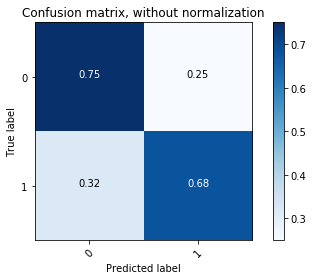

Normalized confusion matrix
[[0.74824818 0.25175182]
 [0.3197903  0.6802097 ]]


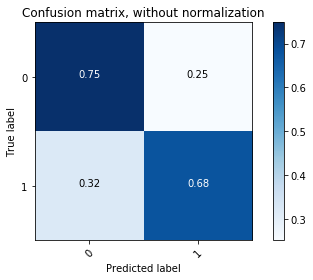

In [26]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
y_pred_up = gr_up_clf.predict(X_test)
y_pred_down = gr_down_clf.predict(X_test)
print("accuracy uptrend is ", accuracy_score(up_y_test, y_pred_up))
print("accuracy downtrend is ", accuracy_score(down_y_test, y_pred_down))
print(confusion_matrix(up_y_test, y_pred_up))
print(confusion_matrix(down_y_test, y_pred_down))

plot_confusion_matrix(confusion_matrix(up_y_test, y_pred_up), classes=[0, 1],
                      title='Confusion matrix, without normalization', normalize=True)
plt.show()
plot_confusion_matrix(confusion_matrix(down_y_test, y_pred_down), classes=[0, 1],
                      title='Confusion matrix, without normalization', normalize=True)
plt.show()

In [39]:
!pip install -U scikit-learn

  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.20.1
    Uninstalling scikit-learn-0.20.1:
      Successfully uninstalled scikit-learn-0.20.1


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\anaconda3\\lib\\site-packages\\~klearn\\ensemble\\_gradient_boosting.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



Normalized confusion matrix
[[0.94621931 0.05378069]
 [0.47619048 0.52380952]]


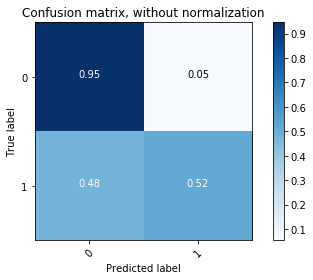

Normalized confusion matrix
[[0.94890763 0.05109237]
 [0.48027769 0.51972231]]


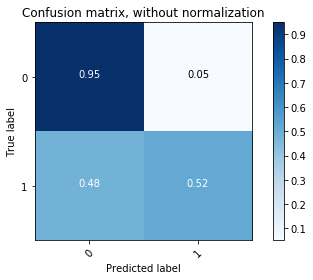

In [ ]:
accuracy uptrend is  0.8475804933157598
accuracy downtrend is  0.8573714931274713
[[7656  621]
 [ 998 1347]]
[[7885  599]
 [ 916 1222]]

In [77]:
X_test

,ar_0_GBPJPY_high,ar_1_GBPJPY_high,ar_0_GBPJPY_low,ar_1_GBPJPY_low,ar_0_GBPJPY_close,ar_1_GBPJPY_close,ar_0_GBPJPY_tick_volume,ar_1_GBPJPY_tick_volume,ar_0_mean_GBPJPY_high_6,ar_1_mean_GBPJPY_high_6,...,ar_1_mindist_GBPJPY_close_120,ar_0_mindist_GBPJPY_low_6,ar_1_mindist_GBPJPY_low_6,ar_0_mindist_GBPJPY_low_12,ar_1_mindist_GBPJPY_low_12,ar_0_mindist_GBPJPY_low_24,ar_1_mindist_GBPJPY_low_24,ar_0_mindist_GBPJPY_low_120,ar_1_mindist_GBPJPY_low_120,hour
2020-05-21 05:00:00,-0.162,-0.290,-0.098,-0.228,-0.004,-0.198,-705.0,-529.0,-0.041000,-0.045333,...,-0.198,0.000,-0.010,0.000,-0.010,0.000,-0.010,-0.098,-0.228,5
2020-05-21 06:00:00,-0.020,-0.182,0.032,-0.066,-0.039,-0.043,-1008.0,-1713.0,-0.063833,-0.104833,...,-0.043,0.032,0.032,0.032,0.032,0.032,0.032,0.032,-0.066,6
2020-05-21 07:00:00,-0.005,-0.025,0.021,0.053,0.044,0.005,-240.0,-1248.0,-0.070667,-0.134500,...,0.005,0.021,0.053,0.021,0.053,0.021,0.053,0.021,0.053,7
2020-05-21 08:00:00,-0.006,-0.011,-0.058,-0.037,-0.098,-0.054,284.0,44.0,-0.062167,-0.132833,...,-0.054,-0.053,-0.032,-0.053,-0.032,-0.053,-0.032,-0.058,-0.037,8
2020-05-21 09:00:00,0.127,0.121,0.011,-0.047,0.209,0.111,1599.0,1883.0,-0.032333,-0.094500,...,0.111,0.011,-0.042,0.011,-0.042,0.011,-0.042,0.011,-0.047,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-19 20:00:00,-0.249,-0.307,-0.085,-0.239,-0.072,-0.329,-1169.0,-3105.0,-0.005667,-0.003167,...,-0.329,-0.244,-0.398,-0.085,-0.239,-0.085,-0.239,-0.085,-0.239,20
2020-08-19 21:00:00,-0.078,-0.327,-0.236,-0.321,-0.240,-0.312,7529.0,6360.0,-0.020500,-0.026167,...,-0.312,0.000,-0.244,-0.159,-0.244,-0.159,-0.244,-0.236,-0.321,21
2020-08-19 22:00:00,-0.098,-0.176,0.077,-0.159,0.084,-0.156,-5064.0,2465.0,-0.067833,-0.088333,...,-0.156,0.077,0.077,0.077,-0.082,0.077,-0.082,0.077,-0.159,22
2020-08-19 23:00:00,0.019,-0.079,0.031,0.108,0.029,0.113,-4345.0,-9409.0,-0.068333,-0.136167,...,0.113,0.031,0.108,0.031,0.108,0.031,0.108,0.031,0.108,23


In [57]:
result = X_test
result["hour"] = X_test.index.hour
result["minute"] = X_test.index.minute
result["y_pred_up"] = y_pred_up
result["y_pred_down"] = y_pred_down
result["y_true_up"] = up_y_test
result["y_true_down"] = down_y_test

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [80]:
result[["hour", "y_pred_up", "y_pred_down", "y_true_up", "y_true_down", "ar_0_GBPJPY_high", "ar_0_GBPJPY_low"]]

,hour,y_pred_up,y_pred_down,y_true_up,y_true_down,ar_0_GBPJPY_high,ar_0_GBPJPY_low
2020-05-06 12:45:00,12,0,0,1,0,0.016,0.027
2020-05-06 13:00:00,13,1,0,0,0,0.089,0.067
2020-05-06 13:15:00,13,0,0,1,0,-0.032,0.026
2020-05-06 13:30:00,13,1,0,1,1,0.035,-0.029
2020-05-06 13:45:00,13,0,1,0,1,0.046,-0.061
...,...,...,...,...,...,...,...
2020-08-29 22:00:00,22,0,0,0,0,0.000,0.000
2020-08-29 22:15:00,22,0,0,0,0,0.000,0.000
2020-08-29 22:30:00,22,0,0,0,0,0.000,0.000
2020-08-29 22:45:00,22,0,0,0,0,0.000,0.000


In [58]:
result["up_mistake"] = 0
result["down_mistake"] = 0
result["true_pred_up"] = 0
result["true_pred_down"] = 0

result.loc[(result["y_pred_up"] != result["y_true_up"]), "up_mistake"] = 1
result.loc[(result["y_pred_down"] != result["y_true_down"]), "down_mistake"] = 1

result.loc[(result["y_pred_up"] == result["y_true_up"]), "true_pred_up"] = 1
result.loc[(result["y_pred_down"] == result["y_true_down"]), "true_pred_down"] = 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [112]:
result[result["y_pred_up"] != result["y_true_up"]]["up_mistake"]

2019-11-11 21:30:00    1
2019-11-11 22:15:00    1
2019-11-11 23:45:00    1
2019-11-12 00:00:00    1
2019-11-12 00:30:00    1
                      ..
2020-08-19 21:15:00    1
2020-08-19 21:45:00    1
2020-08-19 22:45:00    1
2020-08-19 23:45:00    1
2020-08-20 00:00:00    1
Name: up_mistake, Length: 5638, dtype: int64

In [59]:
plott = result[["hour", "minute", "up_mistake", "down_mistake", "true_pred_up", "true_pred_down"]].groupby(["hour", "minute"]).sum(["up_mistake", 
                                                                            "down_mistake", 
                                                                            "true_pred_up", 
                                                                            "true_pred_down" ])
plott

up_mistake  down_mistake  true_pred_up  true_pred_down
hour minute                                                        
0    0               19            31           173             161
     15              15            13           176             178
     30              12            11           179             180
     45              49            10           142             181
1    0               36            14           155             177
...                 ...           ...           ...             ...
21   45              24            28           168             164
22   0               22            27           170             165
     15              26            34           166             158
     30              32            33           160             159
     45              47            73           145             119

[92 rows x 4 columns]

In [69]:
import matplotlib.pyplot as plt

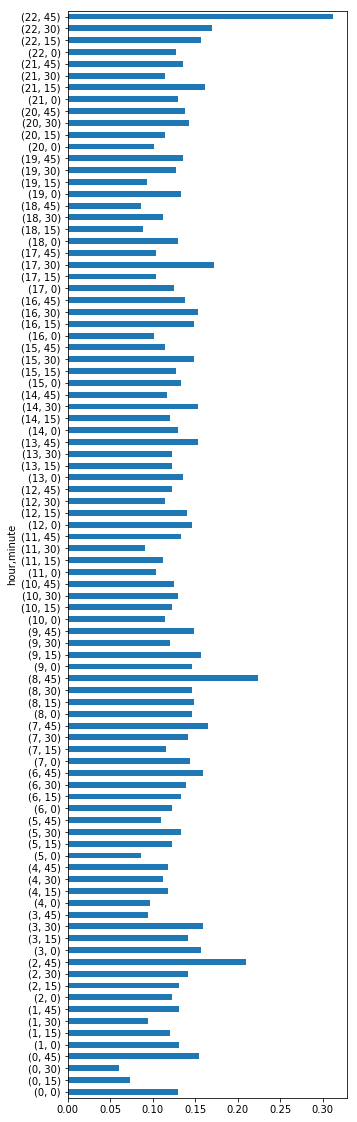

In [60]:
((plott["up_mistake"] + plott["down_mistake"])/ (plott["true_pred_up"] + plott["true_pred_down"] +plott["up_mistake"] + plott["down_mistake"])).plot(kind="barh", figsize=(5,20))
plt.show()